#####**UNIVERSIDAD AUTONOMA DE CHIHUAHUA**
#####**FACULTAD DE INGENIERIA**
#####**CREDIT APPROVAL**
#####**NOMBRE:** JOHANN LOZANO ENRIQUEZ
#####**GRUPO:** 8CC2
#####**MATRICULA:** 338834
#####**DOCENTE:** JESUS ROBERTO LOPEZ SANTILLAN
#####**MATERIA:** DATA SCIENCE
#####***Chihuahua, Chih. 31 de Octubre del 2023***

In [31]:
pip install ucimlrepo

In [32]:
pip install joblib

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# metadata
print(credit_approval.metadata)

# variable information
print(credit_approval.variables)


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [34]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

url = 'https://archive.ics.uci.edu/static/public/27/data.csv'
data = pd.read_csv(url)
data.head(690)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [36]:
print(data.describe())
print(data.tail(17))

               A2          A3          A8        A11          A14  \
count  678.000000  690.000000  690.000000  690.00000   677.000000   
mean    31.568171    4.758725    2.223406    2.40000   184.014771   
std     11.957862    4.978163    3.346513    4.86294   173.806768   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.602500    1.000000    0.165000    0.00000    75.000000   
50%     28.460000    2.750000    1.000000    0.00000   160.000000   
75%     38.230000    7.207500    2.625000    3.00000   276.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

                 A15  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000  
      A1     A2      A3 A4 A5  A6  A7     A8 A9 A10  A11 A12 A13    A14  A15  \
673  NaN  29.50   2.000  y  p   e   h  2.000  f   f    0   f   g  256.0   17   
674    a  3

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [38]:
data.fillna(data.mean(), inplace=True)

# Cuente el número de NaN en el conjunto de datos para verificar
data.isnull().values.sum()

<ipython-input-38-c77069ee7d85>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


42

In [39]:
data.isnull().sum()

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

In [40]:
for col in data.columns:
    # Verifique si la columna es de tipo objeto
    if data[col].dtypes == 'object':
        # Imputar con el valor más frecuente
        data = data.fillna(data[col].value_counts().index[0])

# Cuente el número de NaN en el conjunto de datos e imprima los recuentos para verificar
data.isnull().values.sum()

0

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB
None


In [42]:
data.head(690)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [43]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])

In [44]:
#Verifica la distribucion de las clases
class_distribution = data['A16'].value_counts()
print("Distribucion de clases: ")
print(class_distribution)


Distribucion de clases: 
1    383
0    307
Name: A16, dtype: int64



Distribución de clases en el conjunto de entrenamiento:
1    306
0    246
Name: A16, dtype: int64


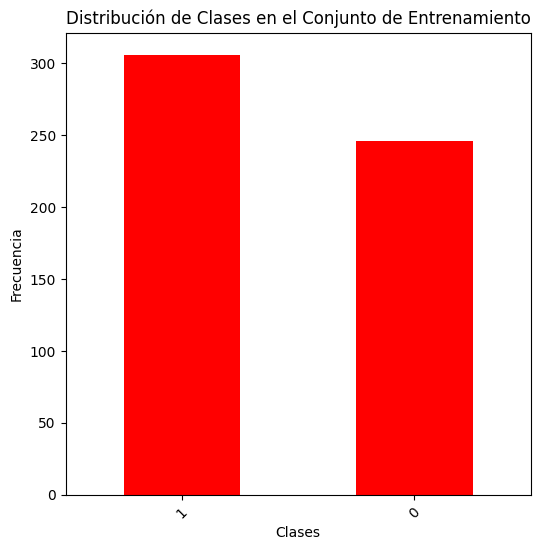


Distribución de clases en el conjunto de prueba:
1    77
0    61
Name: A16, dtype: int64


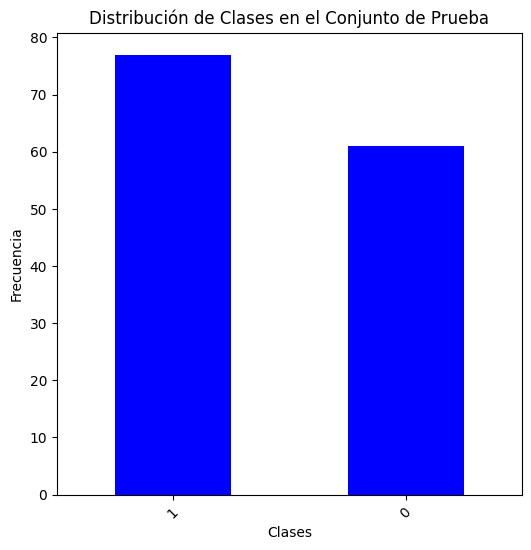

In [45]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%) de manera estratificada
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data.drop('A16', axis=1)
y = data['A16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar la distribución de clases en el conjunto de entrenamiento y prueba
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()

print("\nDistribución de clases en el conjunto de entrenamiento:")
print(train_class_distribution)
# Crear un histograma de la distribución de clases en el conjunto de entrenamiento
plt.figure(figsize=(6, 6))
train_class_distribution.plot(kind='bar', color='red')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_distribution)
# Crear un histograma de la distribución de clases en el conjunto de prueba
plt.figure(figsize=(6, 6))
test_class_distribution.plot(kind='bar', color='blue')
plt.title('Distribución de Clases en el Conjunto de Prueba')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt


##**RandomForestClassifier**



In [47]:
# Creamos el clasificador RandomForest
rf_classifier = RandomForestClassifier(random_state=42)

# Definimos hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Creamos un objeto GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5)

# Realizamos la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_rf_model = grid_search_rf.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos la precisión
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo: {accuracy_rf}")


Precisión del modelo: 0.8333333333333334


In [48]:
# Calcula la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calcula la precisión
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

# Calcula el recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calcula el F1-score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Imprime los resultados
print("Matriz de Confusión - RandomForest:")
print(cm_rf)
print("Precisión:", precision_rf)
print("Recall:", recall_rf)
print("F1:", f1_rf)


Matriz de Confusión - RandomForest:
[[52  9]
 [14 63]]
Precisión: 0.836489898989899
Recall: 0.8333333333333334
F1: 0.8338177526466911


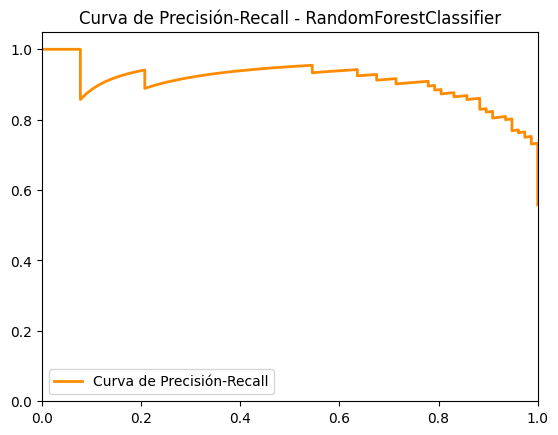

In [49]:
# Calcula las probabilidades de predicción del modelo
y_pred_rf_proba = best_rf_model.predict_proba(X_test)

# Calcula la precisión y el recall a través de diferentes umbrales de decisión
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf_proba[:, 1])

# Grafica la curva de precisión-recall
plt.figure()
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='Curva de Precisión-Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva de Precisión-Recall - RandomForestClassifier')
plt.legend(loc='lower left')
plt.show()

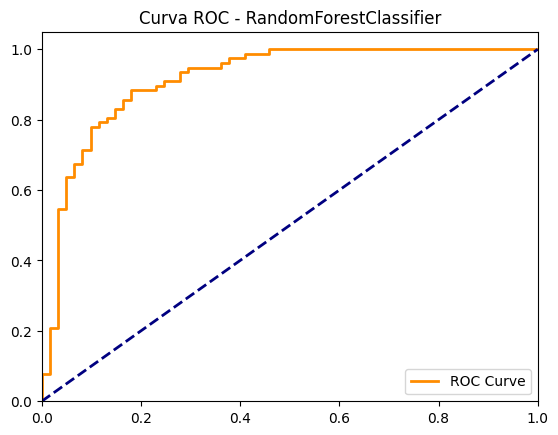

In [50]:
# Calcula las tasas de verdaderos positivos (TPR), tasas de falsos positivos (FPR) y umbrales (thresholds)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_proba[:, 1])

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

##**SVM (Support Vector Machine)**


In [51]:
# Creamos el clasificador SVM
svm_classifier = SVC(kernel='rbf', random_state=42)

# Definimos hiperparámetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
}

# Creamos un objeto GridSearchCV
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Realizamos la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_svm.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_svm_model = grid_search_svm.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos la precisión
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo: {accuracy_svm}")

Precisión del modelo: 0.7028985507246377


In [52]:
# Calcula la matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Calcula la precisión
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

# Calcula el recall
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Calcula el F1-score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Imprime los resultados
print("Matriz de Confusión - SVM:")
print(cm_svm)
print("Precisión:", precision_svm)
print("Recall:", recall_svm)
print("F1:", f1_svm)

Matriz de Confusión - SVM:
[[40 21]
 [20 57]]
Precisión: 0.702434039390561
Recall: 0.7028985507246377
F1: 0.7026292505573393


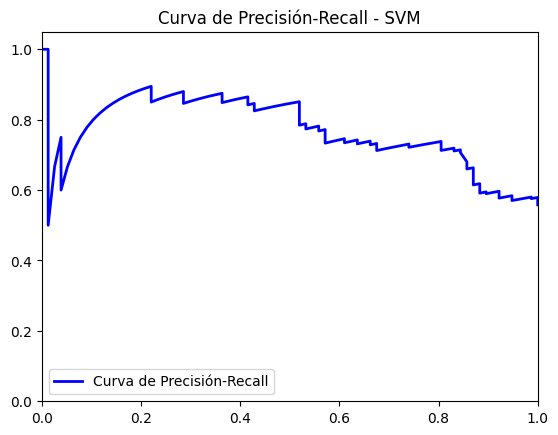

In [53]:
# Calcula las decision_function del modelo SVM (puntuaciones de decisión)
y_pred_svm_scores = best_svm_model.decision_function(X_test)

# Calcula la precisión y el recall a través de diferentes umbrales de decisión
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm_scores)

# Grafica la curva de precisión-recall
plt.figure()
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label='Curva de Precisión-Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva de Precisión-Recall - SVM')
plt.legend(loc='lower left')
plt.show()

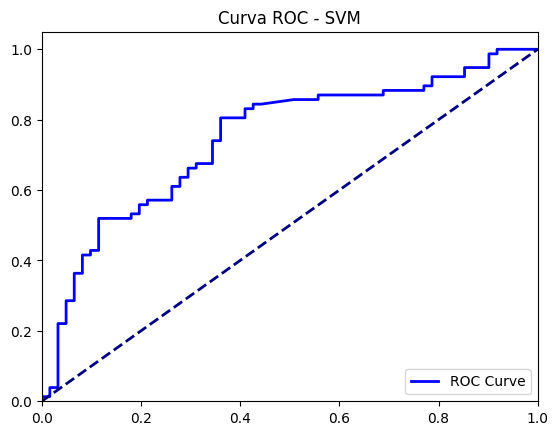

In [54]:
# Calcula las tasas de falsos positivos (FPR) y tasas de verdaderos positivos (TPR)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_scores)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC - SVM')
plt.legend(loc='lower right')
plt.show()

##**ExtraTreesClassifier**

In [55]:
""" ExtraTreesClassifier """
# Creamos el clasificador ExtraTrees
et_classifier = ExtraTreesClassifier(random_state=42)

# Definimos hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Creamos un objeto GridSearchCV
grid_search_et = GridSearchCV(et_classifier, param_grid, cv=5)

# Realizamos la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_et.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_et_model = grid_search_et.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos la precisión
y_pred_et = best_et_model.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Precisión del modelo: {accuracy_et}")

Precisión del modelo: 0.8188405797101449


In [56]:
# Calcula la matriz de confusión
cm_et = confusion_matrix(y_test, y_pred_et)

# Calcula la precisión
precision_et = precision_score(y_test, y_pred_et, average='weighted')

# Calcula el recall
recall_et = recall_score(y_test, y_pred_et, average='weighted')

# Calcula el F1-score
f1_et = f1_score(y_test, y_pred_et, average='weighted')

# Imprime los resultados
print("Matriz de Confusión - ExtraTrees:")
print(cm_et)
print("Precisión:", precision_et)
print("Recall:", recall_et)
print("F1:", f1_et)

Matriz de Confusión - ExtraTrees:
[[52  9]
 [16 61]]
Precisión: 0.8242540494458652
Recall: 0.8188405797101449
F1: 0.8194424382493138


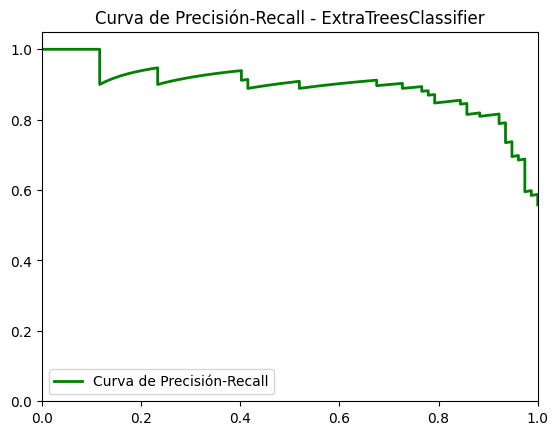

In [57]:
# Calcula las probabilidades de predicción del modelo
y_pred_et_proba = best_et_model.predict_proba(X_test)

# Calcula la precisión y el recall a través de diferentes umbrales de decisión
precision_et, recall_et, thresholds_et = precision_recall_curve(y_test, y_pred_et_proba[:, 1])

# Grafica la curva de precisión-recall
plt.figure()
plt.plot(recall_et, precision_et, color='green', lw=2, label='Curva de Precisión-Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva de Precisión-Recall - ExtraTreesClassifier')
plt.legend(loc='lower left')
plt.show()

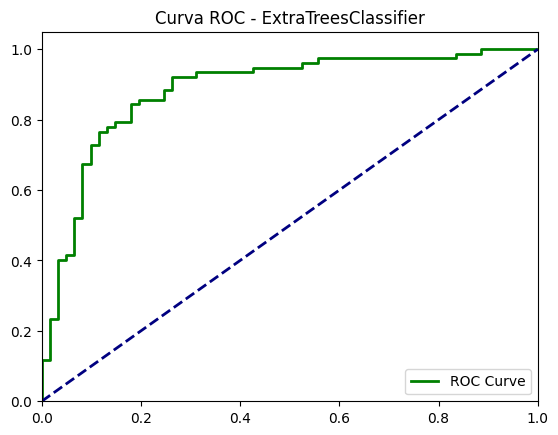

In [58]:
# Calcula las tasas de falsos positivos (FPR) y tasas de verdaderos positivos (TPR)
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_pred_et_proba[:, 1])

# Grafica la curva ROC
plt.figure()
plt.plot(fpr_et, tpr_et, color='green', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC - ExtraTreesClassifier')
plt.legend(loc='lower right')
plt.show()

In [59]:
import joblib

In [60]:
joblib.dump(best_rf_model, 'my_model.pkl')


['my_model.pkl']